In [1]:
import sys
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from tqdm import tqdm
c, mu0, eps0 = 299792458., 4*np.pi*1e-7, 8.854e-12

nu = 1e9
Lambda = c / nu
w, a = 2 * np.pi *nu, 3e-5
dz, k, z_c = Lambda/1e3, w/c, 0*Lambda
L = Lambda/2
N = int(L/dz) if int(L/dz)%2!=0 else int(L/dz)+1
U_0 = 10

z, b, s, Z = np.zeros(N), np.zeros(N, dtype = complex), np.zeros((2,N), dtype = complex), np.zeros((N, N), dtype = complex)

def Ei (x, zm):
    return np.exp(-1j*k*np.sqrt((zm - x) ** 2  + a ** 2))/(4 * np.pi * np.sqrt((zm - x) ** 2  + a ** 2))

for m in range (0, N):
    z[m] = -L/2 + dz/2 + dz*m
    s[0][m] = np.exp(1j * k * z[m])
    s[1][m] = np.exp(-1j * k * z[m])
    b[m] = -1j*k/(2*w*mu0) * np.exp(-1j * k * abs(z[m] - z_c)) * U_0 / dz

Data = {}
for m in tqdm(range (0,N)):
    for n in range (0,N):
        if abs(z[n]-z[m]) in Data:
            Z[n][m] = Data[abs(z[n]-z[m])]
            Z[m][n] = Data[abs(z[n]-z[m])]
        else:
            if m == n :
                Z[m][m] = 1/(4*np.pi) * np.log((np.sqrt(1 + 4 * (a * dz) ** 2) + 1)/(np.sqrt(1 + 4 * (a * dz) ** 2) - 1+1e-12)) - 1j * k * dz / (4 * np.pi)
                print((np.sqrt(1 + 4 * (a * dz) ** 2) - 1))
                Data[abs(z[m]-z[n])] = Z[n][m]
            else : 
                Z[m][n] = integrate.quad(lambda x: (Ei(x, z[m]).real), z[n] - dz, z[n] + dz)[0] + 1j * integrate.quad(lambda x: (Ei(x, z[m]).imag), z[n] - dz, z[n] + dz)[0]
                Data[abs(z[m]-z[n])] = Z[n][m]

 31%|███       | 155/501 [00:00<00:00, 840.58it/s]

0.0


100%|██████████| 501/501 [00:00<00:00, 1265.20it/s]


In [2]:
u1, u2 = np.zeros(N), np.zeros(N)
u1[0], u2[N-1] = 1, 1
U = np.array([u1, u2])
C = - linalg.solve(np.array([np.dot(U, linalg.solve(Z, s[0])), np.dot(U, linalg.solve(Z, s[1]))]), np.dot(U, linalg.solve(Z, b)))

I = linalg.solve(Z, s[0] * C[0]) + linalg.solve(Z, s[1] * C[1]) + linalg.solve(Z, b)

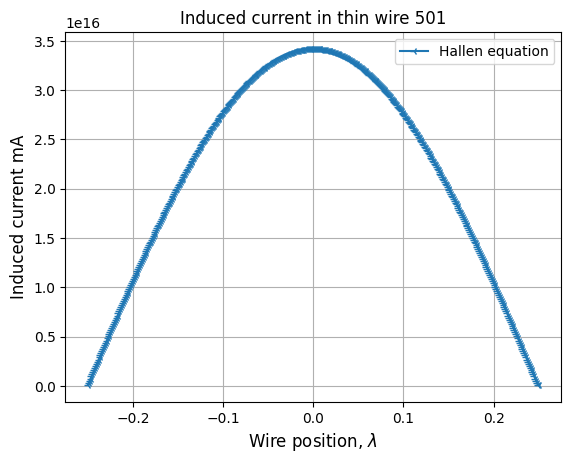

In [3]:
import matplotlib.pyplot as plt
plt.plot((np.arange(N)*dz - L/2)/Lambda, np.abs(I)*1000*dz, marker = '3', label = 'Hallen equation')

plt.legend()
plt.grid()
plt.ylabel("Induced current mA", size = 12)
plt.xlabel("Wire position, $\\lambda$", size = 12)
plt.title(f"Induced current in thin wire {len(I)}")
plt.show() 

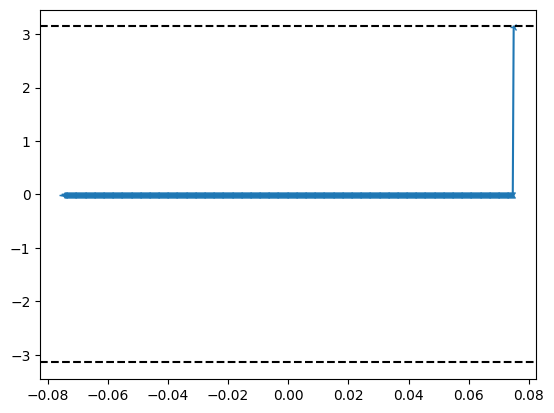

In [4]:
import matplotlib.pyplot as plt
plt.plot(np.arange(N)*dz - L/2, np.angle(I), marker = '3')
plt.axhline(np.pi, linestyle = '--', color = 'black')
plt.axhline(-np.pi, linestyle = '--', color = 'black')

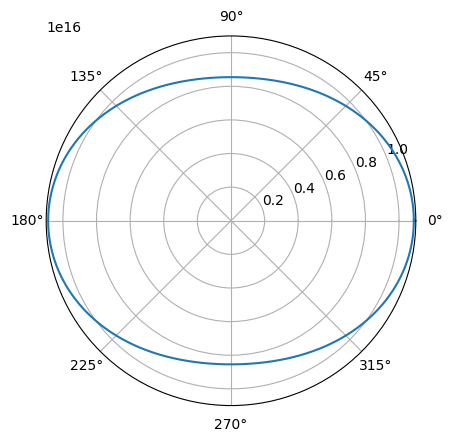

In [5]:
z0 = np.arange(N) * dz - L/2
E = lambda phi : np.abs(np.sum(np.exp(-1j * k * z0 * np.sin(phi)) * I) * dz)
phi = np.linspace (0, 2*np.pi, 1000)
plt.polar(phi, [E(phi_i) for phi_i in phi])